## Final Project Submission

Please fill out:
* Student name: George Bennett
* Student pace: part-time
* Scheduled project review date/time: Tuesday, july 30th, 11:45 AM
* Instructor name: Pablo Crespo
* Blog post URL: https://medium.com/@georgewillben/scrubbing-data-95614ca03fd5?sk=41f3c91897211a2be6a0b088592f87c9
* Video presentation URL: https://youtu.be/dLeri8IzdHU

In this project I will be using the data provided in the file 'kc_house_data.csv' to create a model which will be able to predict a house price based on certain attributes of a house. I will be using the five step OSEMN method for this assignment. This is an iterative process, meaning I may go back and revisit some of the previous steps. I will go into more detail on each of the steps as I proceed. The five steps of the OSEMN method are as follows: <br>
* Obtain
* Scrub
* Explore
* Model
* Interpret

# Obtain

The goal of the obtain step is to take the file(s) provided to you and transform them into a form where they are more easily delt with. I transformed the dataset from the 'kc_house_data.csv' file into a dataframe object using pandas. I then saved this dataframe to a variable 'df'.

In [1]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


This concludes the 'Obtain' step.

# Scrub

The goal of the scrub step is to transform the data to make it usable for creating a model. The scrub step is often the longest step so I broke the step down into parts. To scrub the data I did the following: <br>
* Casted data to the appropriate data types
* Identified and deal with null values and duplicate values
* Removed unnecessary columns
* Checked for and deal with multicollinearity
* Normalized and scaled the data
* One-hot encoded categorial columns

##### Cast data to appropiate data types

Here I viewed all the different columns and there current data-type

In [2]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Here I checked the number of unique values for every column.

In [3]:
for column in df.columns:
    if df[column].nunique() < 10:
        print(column, ' ', df[column].nunique())

floors   6
waterfront   2
view   5
condition   5


For the date column I changed it to a datetime value and then converted that datetime value to an interger. I did this because I could not effectively use this column otherwise

In [4]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")

# Change datetime to an interger
df['date'] = df['date'].astype('int64')

# Double check
print(df['date'][0], df['date'].dtype)

1413158400000000000 int64


floors, waterfront, condition, view, and zipcode needed to be of the categorical data-type. I chose to make these categorical because floors, condition, waterfront and view have low amounts of  unique values. I chose to make zipcode categorial because zipcodes have no mathmatical relation to one another.

In [5]:
# Change floors to category data-type
df['floors'] = df['floors'].astype('category')

In [6]:
# Change condition to category data-type
df['condition'] = df['condition'].astype('category')

In [7]:
# Change zipcode to category data-type.
df['zipcode'] = df['zipcode'].astype('category')

I will wait to change waterfront and view because they contain null values. I commented out the two cells below.

In [8]:
# Change waterfront to category type
#df['waterfront'] = df['waterfront'].astype('category')

In [9]:
# Change view to category type
#df['view'] - df['view'].astype('category')

It became apparent to me that there are question marks instead of numbers in the sqft_basement column.
I will change this column to the appropriate data-type after I dealt with the missing data. For now I will comment it out. I chose to change sqft_basement to a float because it had no value as a string.

In [10]:
# Change sqft_basement to be of the float data-type
#df['sqft_basement'].astype(float, inplace=True)
#df['sqft_basement'].dtype

I checked to confirm that all of the columns were of the appropriate data-type (except for sqft_basement, waterfront, and view)

In [11]:
df.dtypes

id                  int64
date                int64
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors           category
waterfront        float64
view              float64
condition        category
grade               int64
sqft_above          int64
sqft_basement      object
yr_built            int64
yr_renovated      float64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

##### Identify and deal with null values and duplicate values

Next I identified duplicate values

In [12]:
# Create a column of the dataframe where elements are either true or false depending on whether the coorisponidng row is duplicate.
duplicate_data = df.duplicated()

# Print how many duplicate rows were found
print(duplicate_data.sum())

0


There were zero duplicate rows

To identify columns with null values I used a for loop to check each column and if said column contains null values I appended it's name to a new list variable 'contains_nulls'. I then printed each column name and the number of how many null values it contained and compared it to the amount of rows that were in the dataframe.

In [13]:
import numpy as np

# Create list to contain column names of columns containing null values
contains_nulls = []

# Iterate through every column in the dataframe
# Check to see if that column has nulls by using the .isna() method and the .sum() method
# If a column contains nulls append that column's name to the list 'contains_nulls'.
for column in df.columns:
    if df[column].isna().sum() > 0: 
        contains_nulls.append(column) 
        print(column, df[column].isna().sum())
        
# Print how many rows are in the dataframe
print('rows in dataframe ', len(df))

waterfront 2376
view 63
yr_renovated 3842
rows in dataframe  21597


For the waterfront, view, and yr_renovated columns I replaced the null values in each column with that columns median.

In [14]:
df['waterfront'].replace(np.nan, df['waterfront'].median(), inplace = True)
df['view'].replace(np.nan, df['view'].median(), inplace = True)
df['yr_renovated'].replace(np.nan, df['yr_renovated'].median(), inplace = True)

Then I set the floors, waterfront, view, and condition columns to the category datatype.

In [15]:
df['floors'] = df['floors'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')

Next I dealt with the question marks in sqft_basement. I saw how much of sqft_basement is filled with question marks, and I created a list to hold every piece of data that was not a question mark.

In [16]:
import numpy as np

# Create list for storing the data that is in sqft_basement, but is not a question mark
sqft_basement_no_nulls = []

# Iterate through sqft_basement and append all the data to sqft_basement_no_nulls as long as the data is not a question mark
for element in df["sqft_basement"]:
    if element != '?':
        sqft_basement_no_nulls.append(element)
        
# Find what percentage of sqft_basment is populated by question marks
percentage = round(1 - len(sqft_basement_no_nulls) / len(df), 3)*100

# Print out how much of sqft_basement is populated with question marks
print("The sqft_basement column is %{} question marks".format(percentage))

The sqft_basement column is %2.1 question marks


I then replaced the question marks with the median of sqft_basement. To do this I found the median of all the values in sqft_basement that were not question marks. After the holes in the data had been filled I changed the data-type of sqft_basement to float.

In [17]:
# Converted sqft_basement_no_nulls to a pandas series and then found the median of that series
median = pd.Series(sqft_basement_no_nulls).median()

# Repaced question marks with the median value
df['sqft_basement'].replace('?', median, inplace=True)

# Casted sqft_basement to the float data-type
df['sqft_basement'] = df['sqft_basement'].astype(float)

##### Remove unnecessary columns

I First looked at the columns

In [18]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


I removed the id column because I believed it to be irrelevent.

In [19]:
df.drop('id', axis=1, inplace=True)

##### Check for and deal with multicolinearity

First I made a heat map to visually see how the predictor columns may be correlated.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# set style
sns.set(style='white')

# create correlation matrix
corr = df.drop('price', axis=1).corr()

# make a mask for the upper half
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

# set up the figure
f, ax = plt.subplots(figsize=(12,12))

# create a color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# create heatmap
sns.heatmap(corr, mask=mask, cmap = cmap, vmax = 0.75, center = 0, square = True, linewidths = 0.5, cbar_kws={"shrink":0.5})
plt.show()

<Figure size 1200x1200 with 2 Axes>

Next I made a dataframe that shows wether or not each predictor column's correlation to other columns is over 75%

In [21]:
corr_df = abs(df.drop('price', axis=1).corr()) > 0.75
corr_df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
date,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,True,True,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,True,True,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False


Then I iterated through each column of this new dataframe and checked if any column had two or more values as True. If they did have two or more True values I saved them to a list 'multicolinear_columns'.

In [22]:
# Create list to store the names of multicolinear collumns
multicolinear_columns = []

# Iterate through 'corr_df' and add column names to multicolinear_columns 
# if those columns have two or more values equal to True
for column in corr_df.columns:
    if corr_df[column].sum() > 1:
        multicolinear_columns.append(column)
        
# Print multicolinear_columns
print(multicolinear_columns)   

['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']


I made graphs to see which columns were most suitible for multiple linear regression before I droped any. I also saw which of the multicolinear columns was the most correlated with price.

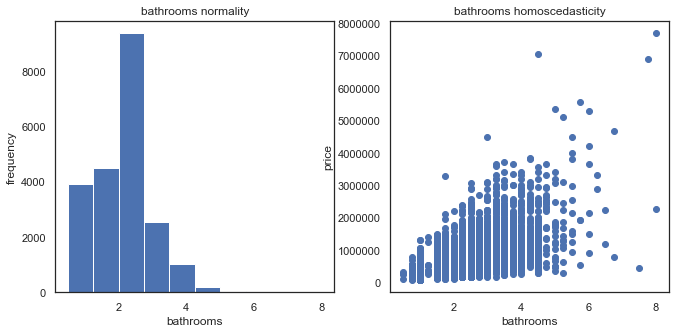

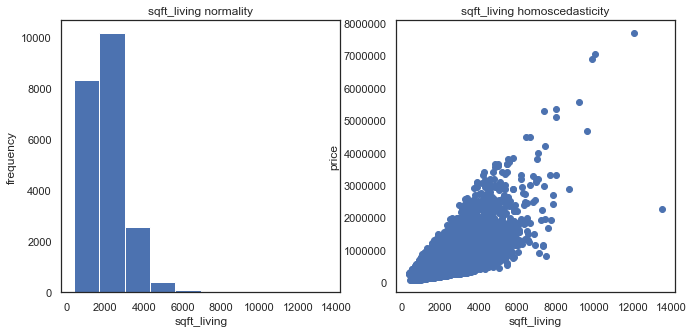

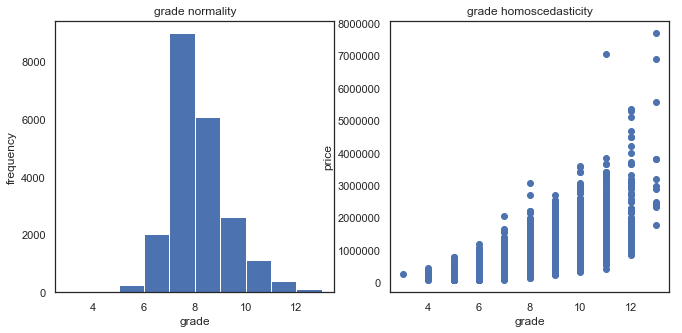

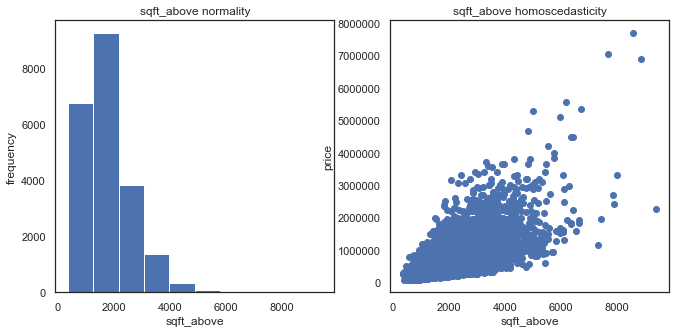

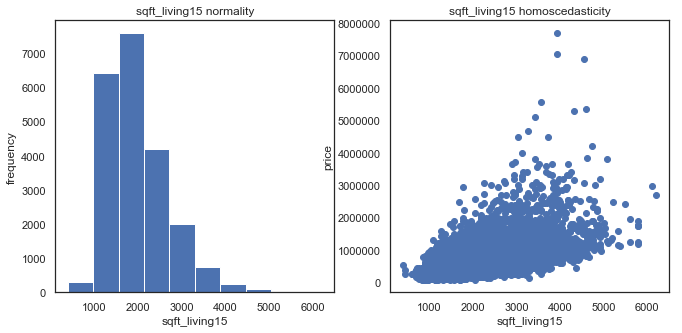

In [23]:
# Iterate through multicolinear columns
for column in multicolinear_columns:
    
    # Create figure for each column
    fig = plt.figure(figsize=(11,5))
    
    # Create axes for subplots
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    
    
    # add titles and labels to subplots
    ax1.set_title(column + ' normality')
    ax1.set_xlabel(column)
    ax1.set_ylabel('frequency')
    ax2.set_title(column + ' homoscedasticity')
    ax2.set_xlabel(column)
    ax2.set_ylabel('price')
    
    # plot histograms on each subplot
    ax1.hist(df[column])
    ax2.scatter(df[column], df['price'])
    
    plt.show()

They all seemed suitable for multiple linear regression so I simply droped all the multicolinear columns except for the one most correlated to price.

In [24]:
# Create a corr dataframe that includes price and view the price column
df[multicolinear_columns + ['price']].corr()['price']

bathrooms        0.525906
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
price            1.000000
Name: price, dtype: float64

sqft_living was most closely correlated to price

In [25]:
# Drop all multicolinear columns from df, Except for sqft_living.
multicolinear_columns.remove('sqft_living')
df = df.drop(multicolinear_columns, axis=1)

##### Normalize and scale the data

First I made a list of the columns with continous numerical data. I named this list 'continous_columns'.

In [26]:
continous_columns = [column for column in df.columns if (df[column].dtype == int) | (df[column].dtype == 'int64') | (df[column].dtype == 'float64')]
print(continous_columns)

['date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_lot15']


The next thing to do was to make sure the data resembles a normal distribution. I did this by iterating through my list, 'continous_columns', and ploting a histogram of each column. At the same time I ploted a histogram of that same column log-transformed. I do this to see both histograms side by side and see which one most closely followed a normal distribution. Note that in order to log-transform some columns I had to change there zero values to a very small number such as 0.001. Also Before I took the log of the 'long' column I needed to remove its negative values. Changing the column with the absolute value function worked as long as all the values are negative.

In [27]:
# Make sure all values were negative
df['long'].describe()

count    21597.000000
mean      -122.213982
std          0.140724
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

In [28]:
# Change the 'long' column to its absolute value
df['long'] = abs(df['long'])

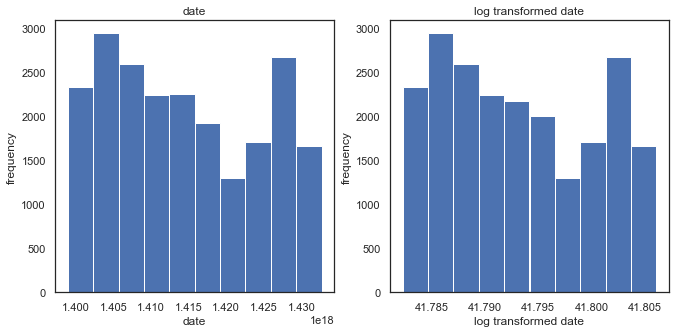

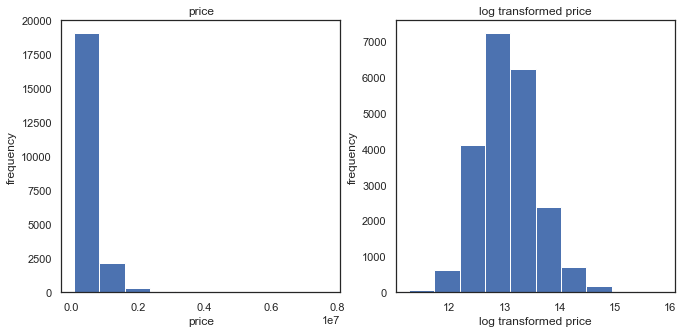

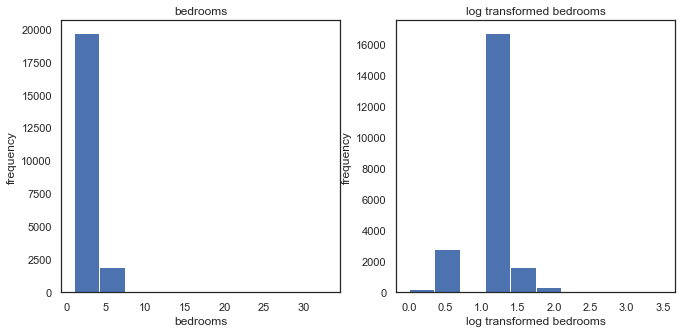

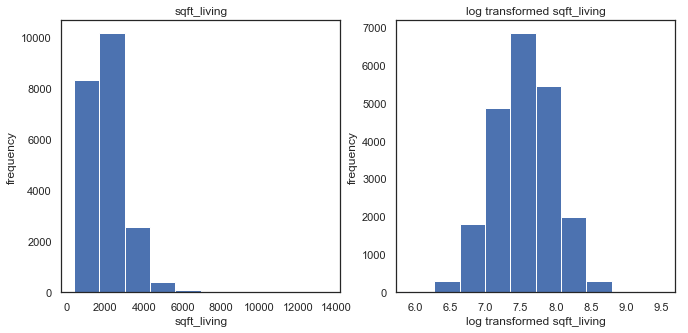

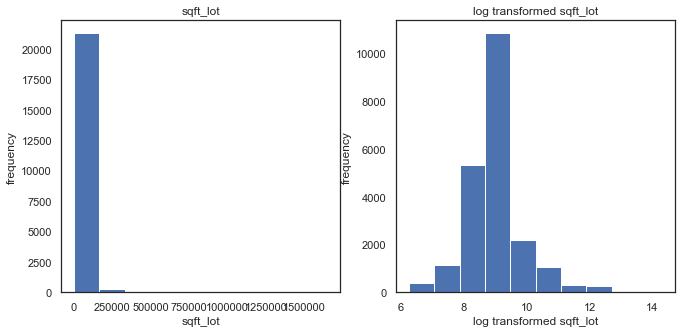

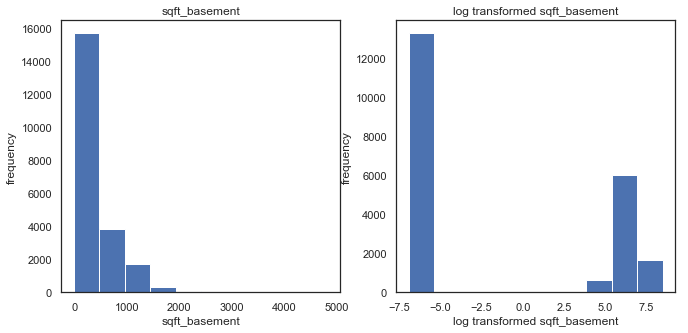

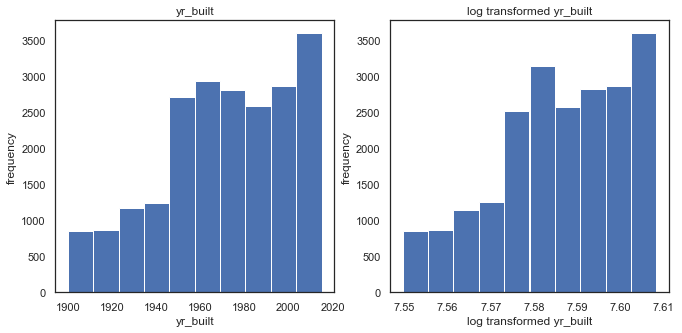

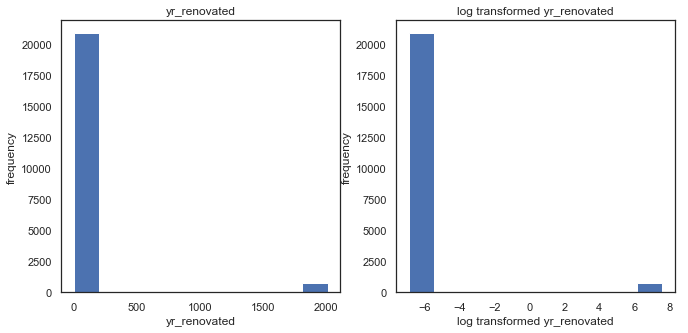

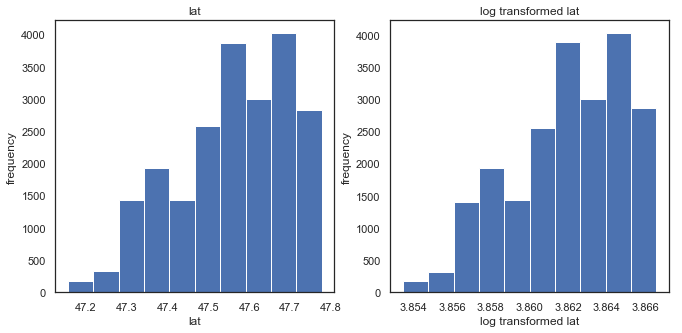

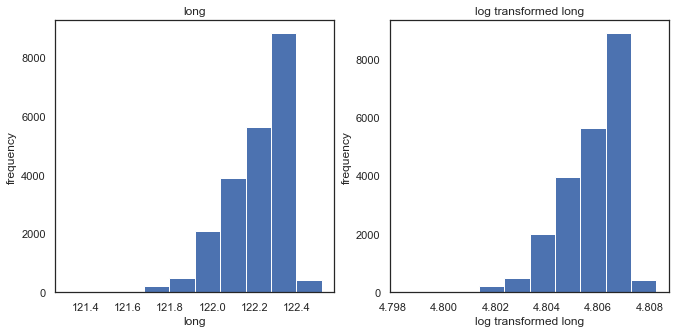

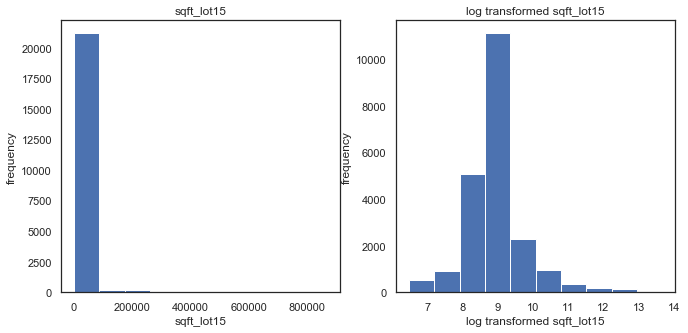

In [29]:
# Iterate through each continous column name
for column in continous_columns:
    
    # Replace zeros with 0.001
    
    df[column].replace(0, 0.001, inplace = True)
    df[column].replace(0.0, 0.001, inplace = True)
    
    # have a log-transformed version of the column saved to a variable 'column_log_transformed'
    column_log_transformed = np.log(df[column])
    
    # Create figure for each column
    fig = plt.figure(figsize=(11,5))
    
    # Create axes for subplots
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    
    
    # add titles and labels to subplots
    ax1.set_title(column)
    ax1.set_xlabel(column)
    ax1.set_ylabel('frequency')
    ax2.set_title('log transformed ' + column)
    ax2.set_xlabel('log transformed ' + column)
    ax2.set_ylabel('frequency')
    
    # plot histograms on each subplot
    ax1.hist(df[column])
    ax2.hist(column_log_transformed)
    
    
    plt.show()

It seemed that price, sqft_living, sqft_lot, and sqft_lot15 needed to be log transformed.

In [30]:
# Log transform the specified columns
for column in ['price', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    df[column] = np.log(df[column])

Next I scaled the data by using the min/max technique. To do this I  First wrote a function which applies the min max formula. Then I used a for loop to iterate through all of the columns with continous data and then ran the min max function on each column and saved each column to its new scaled form.

In [31]:
def min_Max(df, col): ### Function for min-max scaling
    
    # Numerator of the formula
    num = df[column] - df[column].min()
    
    # Denominator of the formula
    den = df[column].max() - df[column].min()
    
    # Return finished column
    return num/den

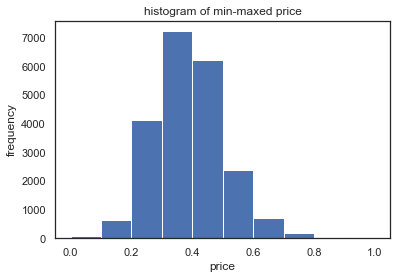

In [32]:
# Iterate through continous columns
for column in continous_columns:
    
    df[column] = min_Max(df, column)
    
# Check if it worked
plt.hist(df['price'])
plt.title('histogram of min-maxed price')
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

##### One hot encoding

First I viewed a list of every column's data-type to see which ones were categorical

In [33]:
df.dtypes

date              float64
price             float64
bedrooms          float64
sqft_living       float64
sqft_lot          float64
floors           category
waterfront       category
view             category
condition        category
sqft_basement     float64
yr_built          float64
yr_renovated      float64
zipcode          category
lat               float64
long              float64
sqft_lot15        float64
dtype: object

I then created dummy columns for each categorical column by collecting the categorical columns into a list and then iterating through the list with a loop using pd.get_dummies on every column.

In [34]:
to_be_dummies = ['floors', 'waterfront', 'view', 'condition', 'zipcode']

for column in to_be_dummies:
    df = pd.get_dummies(df, columns = [column], drop_first = True, prefix = column)

In [35]:
df.columns

Index(['date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_lot15', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'waterfront_1.0', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065'

This concludes the scrub step

# Explore

The goal of the 'Explore' step is to examine the data in depth. To do this I will Examine the descriptive statistics of this data set and I will check the normality and homoscedasticity of every column. I made three questions to anser in the explore step. 
* What columns have good normality
* What remaing columns have good homoscedasticity
* How many outliers are there compared to the length of the dataframe


In [36]:
# Examine descriptive statistics of the data set
df[continous_columns].describe()

,date,price,bedrooms,sqft_living,sqft_lot,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,0.462003,0.388424,0.074162,0.454795,0.339313,0.059277,0.617388,0.034123,0.650142,0.746663,0.344799
std,0.289897,0.114661,0.028947,0.117834,0.111875,0.091249,0.255437,0.180664,0.222860,0.116880,0.112877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.207692,0.308746,0.062500,0.375546,0.281688,0.000000,0.443478,0.000000,0.506997,0.672757,0.285936
50%,0.428205,0.381628,0.062500,0.455945,0.332922,0.000000,0.652174,0.000000,0.668972,0.760797,0.341712
75%,0.746154,0.460022,0.093750,0.536222,0.374881,0.114108,0.843478,0.000000,0.839794,0.841362,0.380616
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Next I will made kernel density plots for each of the continous columns in order to check there distribution.

C:\Users\zasz\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


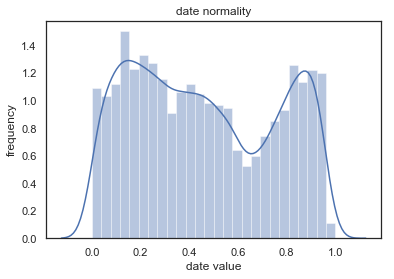

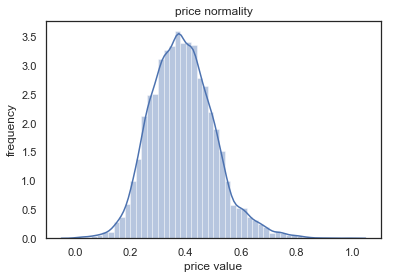

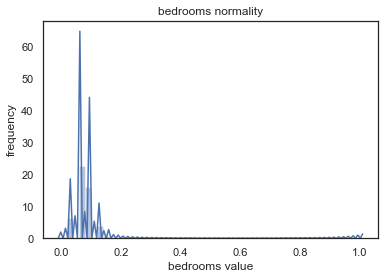

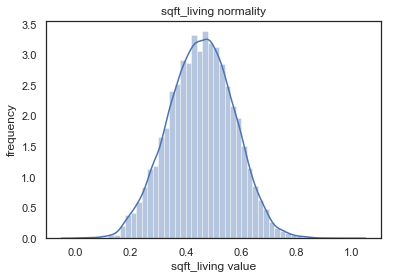

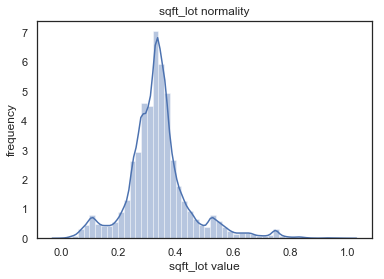

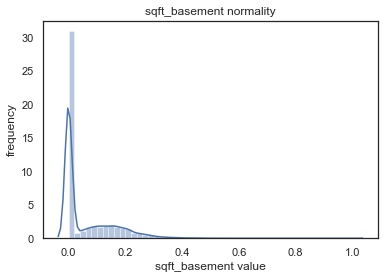

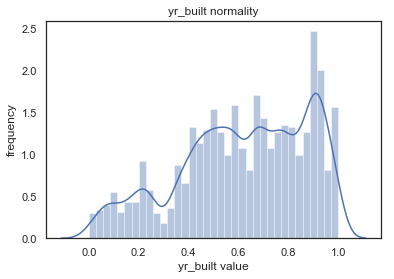

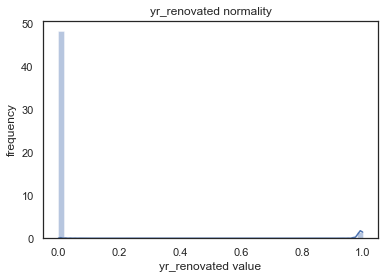

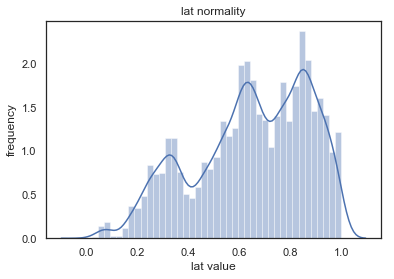

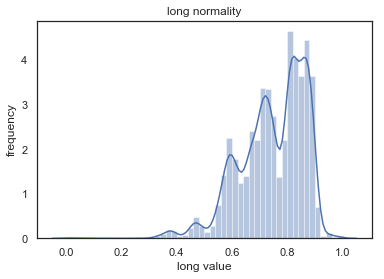

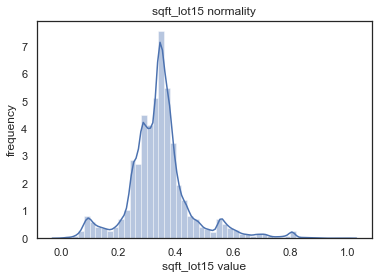

In [37]:
for column in continous_columns:
    sns.distplot(df[column])
    plt.title(column + ' normality')
    plt.xlabel(column + ' value')
    plt.ylabel('frequency')
    plt.show()

Sqft_living and price are the two columns with good normality

Some columns did not follow a normal distribution and needed to be removed. Those columns included:
* date
* bedrooms
* sqft_lot
* sqft_basement
* yr_built
* yr_renovated
* lat
* long
* sqft_lot15

In [38]:
# List of columns to drop
columns_to_remove = ['date', 'sqft_lot', 'bedrooms', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_lot15']

In [39]:
# Drop columns
df = df.drop(columns_to_remove, axis=1)

In [40]:
# Remake continous columns
continous_columns = [column for column in df.columns if (df[column].dtype == int) | (df[column].dtype == 'int64') | (df[column].dtype == 'float64')]
print(continous_columns)

['price', 'sqft_living']


Here I checked for homoscedasticity of sqft_living, the only continous column other than price.

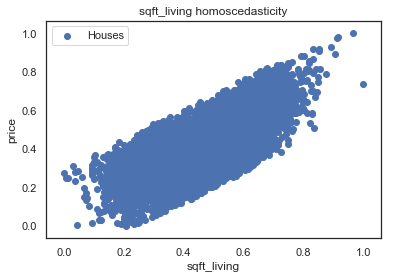

In [41]:
plt.scatter(df['sqft_living'], df['price'], label = 'Houses')
plt.title('sqft_living homoscedasticity')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend()
plt.show()

Sqft_living had good homoscedasticity

Next I removed outliers. To do this I simply iterated through the list 'continous_columns' and removed entire rows that have any value that is more than three standard deviations away from the mean.

In [42]:
# Print how many rows are in the dataframe, 'df', before removing outliers
print(len(df))

# Iterate through continous columns
for column in continous_columns:
    
    # Save the dataframe 'df' so that it only contains values within three standard deviations of the mean
    df = df[df[column] > (df[column].mean() - 3 * df[column].std())]
    df = df[df[column] < (df[column].mean() + 3 * df[column].std())]

# Print how many rows are in the dataframe, 'df', after removing outliers
print(len(df))

21597
21380


To answer the previously asked questions.
* The sqft_living and price columns have good normality
* The sqft_living column, the only predictor column remaining, has good homoscedasticity
* There are 217 outliers and the length of the dataframe including outliers is 2157

This concludes the 'explore' step

# Model

The purpose of the model step is to create a model for making predictions based on the data. All the other steps led up to this one. I broke this step into three parts: Recursive feature elimination, modeling, and holdout validation.

##### Recursive feature selection

In [43]:
len(df.columns)

85

Here is a function for calculateing r-squared and adjusted r-squared. The parameters are the target variable ('y'), the predicted values ('y_hat') and the number of predictors (n_predictors).

In [44]:
def r_sqr(y, y_hat, n_predictors):
    
    # r_2
    num = sum((y-y_hat)**2)
    den = sum((y - np.mean(y))**2)
    r_2 = 1 - num/den
    
    # adj_r_2
    num = (1 - r_2) * (len(y)-1)
    den = len(y) - 1 - n_predictors
    adj_r_2 = 1 - num/den
    
    return r_2, adj_r_2

To perform recursive feature selection I imported RFE and LinearRegression from sklearn. I Then used LinearRegression() as the RFE's estimator and fit the RFE object to the predictors and to the target. I created a loop so that I could try RFE's with diffrent numbers of predictors. For each iteration of the loop I stored each RFE's r-squared and adjusted r-squared to a list called 'list_r_sqr'.

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# The model is based on linear regression, X is all the predictors, y is the target
estimator = LinearRegression()
X = df.drop('price', axis=1)   
y = df.price

#  Make a list to record R-squared for each test model
list_r_sqr = [] 

# Create a loop so that there will be multiple models created by the RFE. Count by five to reduce computtional cost.
for i in range(1,len(df.columns),5):
    
     # Tell the rfe to use linear regression and use i amount of columns
    rfe = RFE(estimator, i)
    
    # Fit the RFE to the pridictors and target
    rfe.fit(X,y)
    
    # Store the results
    results = rfe.support_ 
    
    # obtain y_hat
    y_hat = rfe.predict(X)
    
    # obtainr r-squared
    r_2, adj_r_2 = r_sqr(y, y_hat, rfe.support_.sum())
    
    # add data to list
    list_r_sqr.append([i, r_2, adj_r_2]) 

I then took the data in 'list_r_sqr' and seperated it into three lists so I could plot the r-squared and adjusted r-squared against the number of predictors.

In [46]:
# Gather the data in a form such that it may be graphed
n_features = [] # number of features
r_squareds = [] # r-squareds
adj_r_squareds = [] # adjusted r-squareds
for i in list_r_sqr:
    n_features.append(i[0])
    r_squareds.append(i[1])
    adj_r_squareds.append(i[2])

Next I created the graph.

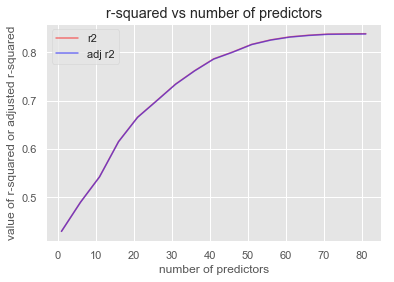

In [47]:
# graph the r-squared against the amount of features used
plt.style.use('ggplot')
plt.plot(n_features, r_squareds, label='r2', color='red', alpha=0.5)
plt.plot(n_features, adj_r_squareds, label='adj r2', color='blue', alpha=0.5)
plt.legend()
plt.title('r-squared vs number of predictors')
plt.xlabel('number of predictors')
plt.ylabel('value of r-squared or adjusted r-squared')
plt.show()

It appeared the more columns that I added the higher the r-squareds became.

Next I checked and saw if any columns were rejected by the RFE and stored those columns in a list 'cols_not_to_use'.

In [48]:
# Run the RFE with max n_features_to_select
rfe = RFE(estimator, len(df.columns))
rfe.fit(X,y)

# Store the results from this RFE
results = rfe.support_ # Contains info on what features where used
cols_to_not_use = [] # list of columns to not be used

# Create a loop that iterates through the results and updates the list cols_to_not_use
for col, result in list(zip(X.columns, results)):
    if result == False:
        cols_to_use.append(col)
        
cols_to_not_use

[]

Zero columns were rejected.

Next I made a model using sklearn.

In [49]:
# Create a model with the best columns
model = LinearRegression()
X = df.drop('price', axis=1)
y = df.price

# Run linear regression
model.fit(X,y) 
y_hat = model.predict(X)

# Print the r-squared and adjusted r-squared
print(r_sqr(y, y_hat, len(df.columns))[:2])

(0.8388189371052228, 0.8381755450536563)


##### Modeling

Then I got a summary of the model using statsmodels.

In [50]:
import statsmodels.api as sm

# Add constant
sm_X = sm.add_constant(X)

# fit model
sm_model = sm.OLS(y, sm_X).fit()

# Summary
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1319.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:54:04   Log-Likelihood:                 36537.
No. Observations:               21380   AIC:                        -7.290e+04
Df Residuals:                   21295   BIC:                        -7.223e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0125      0.009     -1.387      0.165      -0.030       0.005
sqft_living        0.5015      0.003    150.882      0.000       0.495       0.508
floors_1.5         0.0032      0.001      2.762      0.006       0.001       0.005
floors_2.0         0.0115      0.001     14.434      0.000       0.010       0.013
floors_2.5         0.0163      0.004      4.373      0.000       0.009       0.024
floors_3.0        -0.0061      0.002     -3.061      0.002      -0.010      -0.002
floors_3.5        -0.0083      0.018     -0.461      0.645      -0.044       0.027
waterfront_1.0     0.0846      0.005     16.532      0.000       0.075       0.095
view_1.0           0.0324      0.003     12.883      0.000       0.028       0.037
view_2.0           0.0347      0.002     22.755      0.000       0.032       0.038
view_3.0           0.0563      0.002     27.003      0.000       0.052       0.060
view_4.0           0.0884      0.003     26.893      0.000       0.082       0.095
condition_2        0.0246      0.009      2.648      0.008       0.006       0.043
condition_3        0.0516      0.009      5.964      0.000       0.035       0.069
condition_4        0.0557      0.009      6.424      0.000       0.039       0.073
condition_5        0.0662      0.009      7.599      0.000       0.049       0.083
zipcode_98002     -0.0115      0.004     -2.946      0.003      -0.019      -0.004
zipcode_98003      0.0079      0.003      2.265      0.023       0.001       0.015
zipcode_98004      0.2640      0.003     75.822      0.000       0.257       0.271
zipcode_98005      0.1857      0.004     44.975      0.000       0.178       0.194
zipcode_98006      0.1607      0.003     52.184      0.000       0.155       0.167
zipcode_98007      0.1536      0.004     35.186      0.000       0.145       0.162
zipcode_98008      0.1455      0.004     41.341      0.000       0.139       0.152
zipcode_98010      0.0649      0.005     13.019      0.000       0.055       0.075
zipcode_98011      0.1024      0.004     26.212      0.000       0.095       0.110
zipcode_98014      0.0838      0.005     18.151      0.000       0.075       0.093
zipcode_98019      0.0734      0.004     18.625      0.000       0.066       0.081
zipcode_98022      0.0196      0.004      5.263      0.000       0.012       0.027
zipcode_98023   -5.91e-05      0.003     -0.019      0.984      -0.006       0.006
zipcode_98024      0.1178      0.005     21.707      0.000       0.107       0.128
zipcode_98027      0.1247      0.003     39.233      0.000       0.118       0.131
zipcode_98028      0.0929      0.003     26.644      0.000       0.086       0.100
zipcode_98029      0.1405      0.003     41.470      0.000       0.134       0.147
zipcode_98030      0.0111      0.004      3.103      0.002       0.004       0.018
zipcode_9803

I found three predictors with a p-value greater than 0.05, so they were removed. I then got the summary on the new model.


In [51]:
X = df.drop(['price', 'floors_3.5', 'zipcode_98023', 'zipcode_98032'], axis=1)

In [52]:
# Add constant
sm_X = sm.add_constant(X)

# fit model
sm_model = sm.OLS(y, sm_X).fit()

# Summary
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1368.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:54:04   Log-Likelihood:                 36537.
No. Observations:               21380   AIC:                        -7.291e+04
Df Residuals:                   21298   BIC:                        -7.226e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0128      0.009     -1.456      0.146      -0.030       0.004
sqft_living        0.5015      0.003    150.954      0.000       0.495       0.508
floors_1.5         0.0032      0.001      2.763      0.006       0.001       0.005
floors_2.0         0.0116      0.001     14.459      0.000       0.010       0.013
floors_2.5         0.0164      0.004      4.379      0.000       0.009       0.024
floors_3.0        -0.0060      0.002     -3.052      0.002      -0.010      -0.002
waterfront_1.0     0.0846      0.005     16.536      0.000       0.075       0.095
view_1.0           0.0325      0.003     12.886      0.000       0.028       0.037
view_2.0           0.0346      0.002     22.751      0.000       0.032       0.038
view_3.0           0.0563      0.002     27.007      0.000       0.052       0.060
view_4.0           0.0884      0.003     26.893      0.000       0.082       0.095
condition_2        0.0246      0.009      2.649      0.008       0.006       0.043
condition_3        0.0516      0.009      5.963      0.000       0.035       0.069
condition_4        0.0556      0.009      6.422      0.000       0.039       0.073
condition_5        0.0662      0.009      7.598      0.000       0.049       0.083
zipcode_98002     -0.0111      0.003     -3.243      0.001      -0.018      -0.004
zipcode_98003      0.0083      0.003      2.778      0.005       0.002       0.014
zipcode_98004      0.2643      0.003     89.523      0.000       0.259       0.270
zipcode_98005      0.1860      0.004     50.389      0.000       0.179       0.193
zipcode_98006      0.1610      0.002     65.276      0.000       0.156       0.166
zipcode_98007      0.1540      0.004     38.899      0.000       0.146       0.162
zipcode_98008      0.1458      0.003     48.677      0.000       0.140       0.152
zipcode_98010      0.0652      0.005     14.078      0.000       0.056       0.074
zipcode_98011      0.1027      0.003     29.790      0.000       0.096       0.109
zipcode_98014      0.0841      0.004     19.859      0.000       0.076       0.092
zipcode_98019      0.0737      0.003     21.116      0.000       0.067       0.081
zipcode_98022      0.0199      0.003      6.160      0.000       0.014       0.026
zipcode_98024      0.1182      0.005     23.136      0.000       0.108       0.128
zipcode_98027      0.1250      0.003     48.172      0.000       0.120       0.130
zipcode_98028      0.0933      0.003     31.456      0.000       0.087       0.099
zipcode_98029      0.1408      0.003     49.333      0.000       0.135       0.146
zipcode_98030      0.0115      0.003      3.720      0.000       0.005       0.018
zipcode_98031      0.0169      0.003      5.618      0.000       0.011       0.023
zipcode_98033      0.1816      0.003     70.936      0.000       0.177       0.187
zipcode_9803

##### Holdout Validation

First I created a train/test split

In [53]:
from sklearn.model_selection import train_test_split

# Creating a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Then I performed holdout validation

In [54]:
# Fitting the model
model.fit(X_train, y_train)

# Running the model on the data
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

#Finding resdual errors
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

#Finding mean square error
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)

print(mse_train, ' ', mse_test)

0.0018883352253691204   0.0020541916617807343


3 coefficients from the final model and there impact on price.
* sqft_living. The higher the sqft living space the higher the price.
* zipcode_98002. Houses in the zipcode 98002 tend to be less expensive.
* view_4.0. Houses with a good view tend to be more expensive.


The final model was built using the OSEMN method of data science. The model predicts quite accurately the price of a house depending on its square foot living space, view, condition, floors, zipcode and wether or not is it on the waterfront. This dataset provided challenges such as missing values and columns that did not follow the normal distribution. However these challenges were overcome by systematicaly following the OSEMN method.

This concludes the multiple linear regression project.

In [55]:
# Models can be found here, just uncomment

# model.predict(X)

# sm_model.summary()